In [1]:
import pandas as pd

In [56]:
train = pd.read_csv('./data_set/train.csv')
test = pd.read_csv('./data_set/test.csv')
sub = pd.read_csv('./data_set/sample_submission.csv')
sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [18]:
#groupby 사용하기
train[['PassengerId','Survived', 'Sex']].groupby(['Sex']).count()

,PassengerId,Survived
Sex,,
female,314,314
male,577,577


In [14]:
train[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [28]:
# sort_values by 
train.groupby(['SibSp']).mean().sort_values(by='Age', ascending=True)

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


In [30]:
test.dtypes.index

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [32]:
from sklearn.linear_model import LogisticRegression

In [39]:
sel = ['Pclass','SibSp','Parch']

x_train = train[sel]
y_train = train['Survived']
x_test = test[sel]

In [40]:
# 모델 가져오기
model = LogisticRegression()

In [45]:
# 모델 학습 시키기 : Pclass 와 SibSp, Parch 정보로 Survived 여부의 관계성을 파악해서 예측하기
model.fit(x_train,y_train) # input : x_train, output : y_train

LogisticRegression()

In [57]:
pred = model.predict(x_test) # input : x_test
pred[:15]    # test의 15개 항목만 예측해봐

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [58]:
sub.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [59]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [63]:
sub.shape, test.shape

((418, 2), (418, 11))

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
sub['Survived'] = pred
sub.to_csv('logistic_first_submit.csv', index=False)
# -> score :0.67942

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# 컬럼별 데이터 확인
for col1 in train.columns:
    print(col1)
    print(train[col1].head())
    print()

PassengerId
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

Survived
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Pclass
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Sex
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

SibSp
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

Parch
0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

Ticket
0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

Fare
0     7.250

<AxesSubplot:>

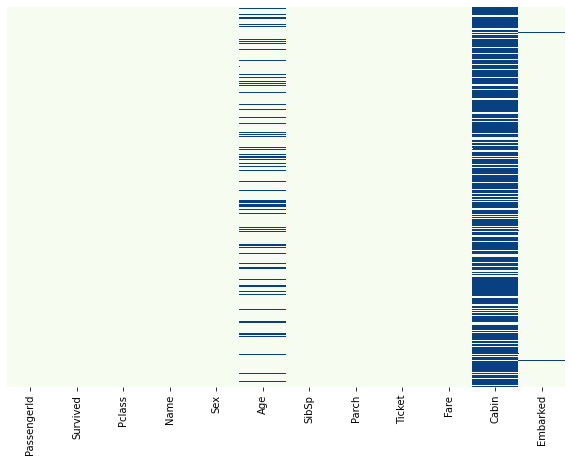

In [74]:
# 결측치 시각화(대략적인 위치정보까지 확인 가능)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7)) # cmpa : summer도 해보기
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="GnBu") 

In [78]:
num_cols=[]
for one in train.columns:
    if train[one].dtype in ['int64','float64']:
        num_cols.append(one)
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [82]:
# 수치형 컬럼 저장하기
num_cols = [col for col in train.columns[:12] if train[col].dtype in ['int64','float64']]
num_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [83]:
# 범주형 컬럼 저장하기
cat_cols = [col  for col in train.columns[:12] if train[col].dtype in ['O'] ]
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [84]:
train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

/Users/works/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/works/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


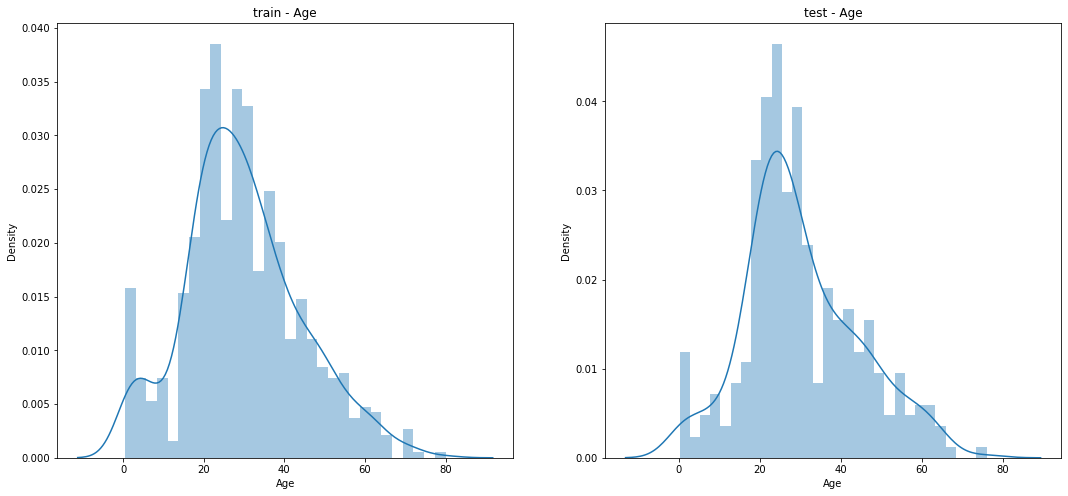

In [92]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

In [96]:
# Age 결측치 값은 중앙값으로 채운다.
train['Age'] = train['Age'].fillna(train['Age'].median()) # 이상치값으로 인한 값 차이가 클때 -> 중앙값사용
test['Age']  = test['Age'].fillna(test['Age'].median())   # 중앙값은 이상치의 영향을 받지 않는다.

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
# Fare 결측치 처리 : 평균값으로 채우기
test['Fare'] = test['Fare'].fillna(test['Age'].mean())
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

In [100]:
# Embarked 결측치처리 : 가장 많은 값으로 결측치를 채운다
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [103]:
train['Embarked'] = train['Embarked'].fillna('S')
train.isnull().sum(), test.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         0
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age              0
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          327
 Embarked         0
 dtype: int64)

In [111]:
# 결측지 없는 값만 학습시키기
# 결측지 없는 데이터는 삭제하기
train['Embarked'].isnull().sum()

0

In [105]:
#자료형 변환
train['Sex']=  train['Sex'].map({'female':0,'male':1}).astype(int)
test['Sex']=  test['Sex'].map({'female':0,'male':1}).astype(int)

train['Embarked'] =  train['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test['Embarked'] =  test['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [113]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.116569
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,-0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

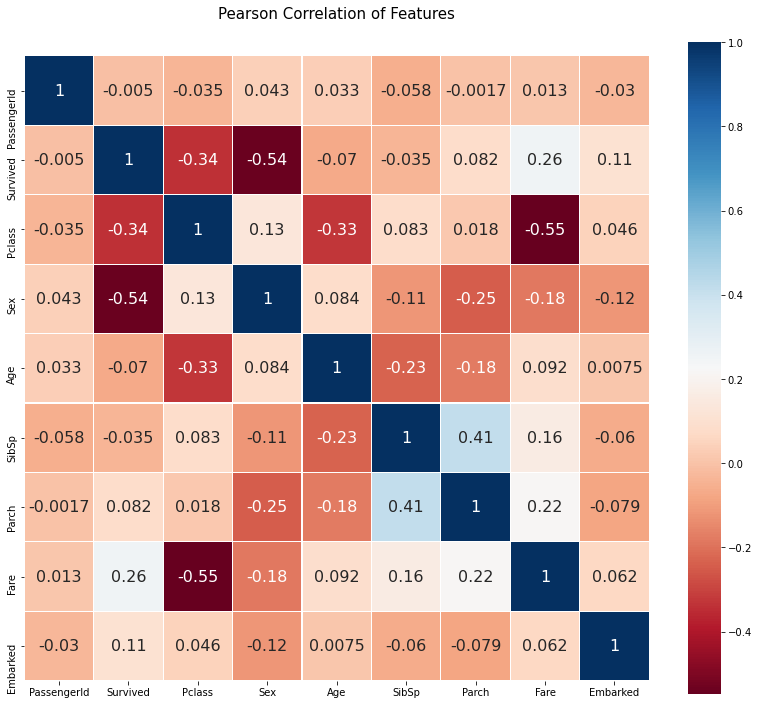

In [114]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

In [120]:
# 'Name', 'Ticket' =>  문자포함됐기 때문에 우선 배제
sel2 = ['Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
x2_train = train[sel2]
y2_train = train['Survived']
x2_test = test[sel2]

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x2_train, y2_train)

# 예측
pred2 = model2.predict(x2_test)
pred2[:15]

sub2 = pd.read_csv("./data_set/sample_submission.csv")
sub2.head(15)

sub2['Survived'] = pred2
sub2.to_csv("logistic_second_submit.csv", index=False)